In [1]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='bs4')


import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

data.sample(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,headlines,text
65130,Posters warning Bodo girls to not wear jeans p...,Posters warning girls of the Bodo tribe in Ass...
64936,500 long-distance trains to run faster from ne...,The Indian Railways will soon cut short the ru...
58286,Andhra Pradesh govt approves 5% reservation fo...,The Andhra Pradesh Assembly has unanimously pa...
85646,Batman actor Adam West dies aged 88,"Adam West, who played Batman in American Broad..."
7243,Dalit outfit booked for forcing UP priest out ...,An FIR has been lodged against members of Dali...
53832,K'taka CM gives free laptops worth Ã¢ÂÂ¹45 cr...,Karnataka Chief Minister Siddaramaiah on Wedne...
57286,Manish Arora unveils 'All we need is love' art...,Fashion designer Manish Arora has unveiled his...
55438,Teen accused in Ryan school murder case files ...,The 16-year-old accused in the Ryan Internatio...
88222,Beauty bloggers stick pom-poms on their face i...,Beauty bloggers have been sharing pictures of ...
49003,"New poster of Anushka, Parambrata starrer 'Par...",A new poster of Anushka Sharma and Bengali act...


In [30]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
print('전체 headline 데이터', len(data['headlines']))
print('유니크한 headline 데이터: ', (data['headlines'].nunique()))
print('전체 text 데이터', len(data['text']))
print('유니크한 text데이터', data['text'].nunique())

전체 headline 데이터 98401
유니크한 headline 데이터:  98280
전체 text 데이터 98401
유니크한 text데이터 98360


In [3]:
data.drop_duplicates(subset=['text'], inplace=True)

In [4]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [5]:
# 정규화 사전
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}
# 불용어 리스트 확인
print('불용어 개수 : ', len(stopwords.words('english')))
print(stopwords.words('english'))

불용어 개수 :  179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', '

In [6]:
from collections import Counter
def preprocess_sentence(sentence, remove_stopwords=True):
  sentence = sentence.lower()
  sentence = BeautifulSoup(sentence, 'lxml').text # remove html tag
  sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 제거
  sentence = re.sub('"', '', sentence)
  sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")])
  sentence = re.sub(r"'s\b", "", sentence)
  sentence = re.sub("[^a-zA-Z0-9]", " ", sentence)

  # 단어 내에 같은 문자들이 3개 이상 연속해서 반복되면 삭제하고 최대 2개까지만 반복되도록 만들어줌 (ex. iiit -> iit)
  b = []
  for i in sentence.split():
    a = list(i)
    char_cnt = 0
    for j in a:
      if a.count(j) >= 3:
        a.remove(j)
    word_a = ''.join(a)
    b.append(word_a)
  sentence = ' '.join(b)


  # 불용어 제거
  if remove_stopwords:
    tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)

  # 불용어 미제거
  else:
    tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
  return tokens
# 샘플 문장을 확인

temp_text = 'Everything I bought was great, infact I ordered iiiiit twice and the third ordered 123 was<br />for my mother and father. '
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  everything bought great infact ordered iit twice third ordered 123 wasfor mother father
summary: great way to start the day


In [7]:
# data['text'] 부분 전처리 진행

clean_text = []
for s in data['text']:
  clean_text.append(preprocess_sentence(s))

print('Text 전처리 후 결과 : ', clean_text[:5])

Text 전처리 후 결과 :  ['saurav kant alumnus upgrad iit pg program machine learning artficial intlligence sr ystems ngineer infosys almost years work xprience program upgrad 360 dgree career support helped transition data scientist tech mahindra 90 salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending 200 cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bokmyshow ubereats cult fit', 'new zealand dfeated india wickets fourth odi hamilton thursday win first match five match odi series india lost iternational match rohit sharma captaincy 12 consecutive victories dating back march 2018 match witnessed india getting 92 seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save 46 800 taxes plan provides life cover age 100 years also 

In [8]:
# headline 부분 전처리 진행
clean_headlines = []
for s in data['headlines']:
  clean_headlines.append(preprocess_sentence(s, False))

print('Headlines 전처리 후 결과 : ', clean_headlines[:5])

<ipython-input-6-38fe2475afb8>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentence = BeautifulSoup(sentence, 'lxml').text # remove html tag


Headlines 전처리 후 결과 :  ['upgrad learner switches to career in ml al with 90 salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india 12 match wining streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']


In [9]:
data['text'] = clean_text
data['headlines'] = clean_headlines

data.replace('', np.nan, inplace=True)

data.isnull().sum()

headlines    0
text         0
dtype: int64

In [10]:

data.replace('', np.nan, inplace=True)

data.isnull().sum()

headlines    0
text         0
dtype: int64

텍스트 길이 최대:  60
텍스트 길이 최소:  1
텍스트 길이 평균:  36.42161447742985
헤드라인 길이 최대:  16
헤드라인 길이 최소:  1
헤드라인 길이 평균:  9.569611630744205


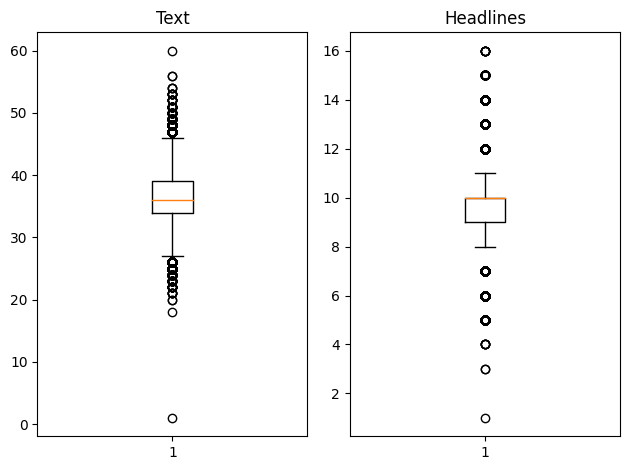

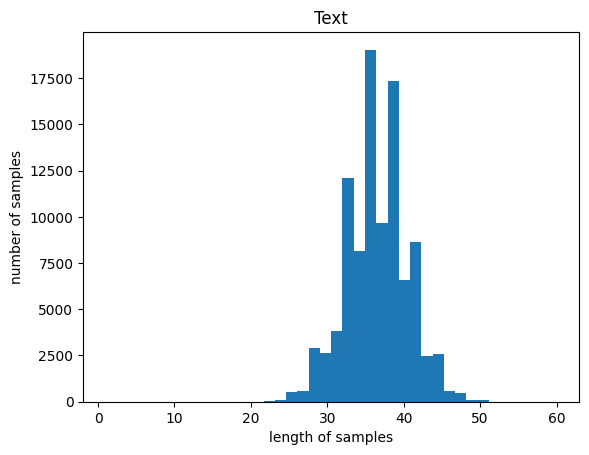

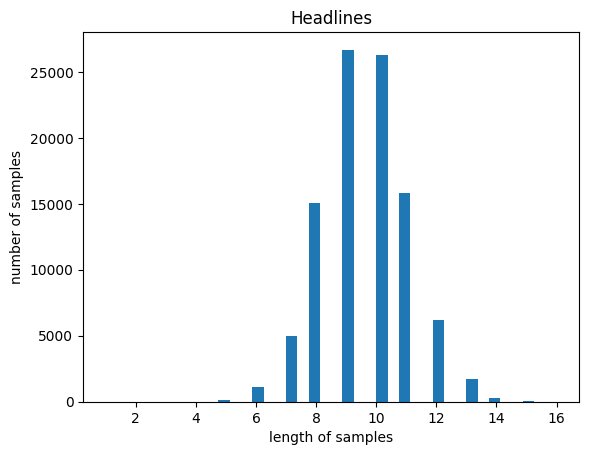

In [11]:
import matplotlib.pyplot as plt

text_len = [len(x.split()) for x in data['text']]
headlines_len = [len(x.split()) for x in data['headlines']]

print('텍스트 길이 최대: ', np.max(text_len))
print('텍스트 길이 최소: ', np.min(text_len))
print('텍스트 길이 평균: ', np.mean(text_len))
print('헤드라인 길이 최대: ', np.max(headlines_len))
print('헤드라인 길이 최소: ', np.min(headlines_len))
print('헤드라인 길이 평균: ', np.mean(headlines_len))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('Headlines')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [12]:
# 텍스트, 헤드라인 최대 길이 설정
max_text_len = 60
max_headline_len = 16

# 최대 길이를 기준으로 나눴을때 최대 길이보다 짧은 데이터의 비율을 출력해주는 함수 정의
def below_threshold_len(max_len, list):
  count = 0
  for s in list:
    if len(s.split()) <= max_len:
      count += 1

  print(f'길이가 {max_len}보다 짧은 데이터의 비율 : {count/len(list)}')


# 비율 확인
below_threshold_len(max_text_len, data['text'])
below_threshold_len(max_headline_len, data['headlines'])

길이가 60보다 짧은 데이터의 비율 : 1.0
길이가 16보다 짧은 데이터의 비율 : 1.0


In [13]:
data['decoder_input'] = data['headlines'].apply(lambda x : 'starttoken ' + x)
data['decoder_output'] = data['headlines'].apply(lambda x : x + ' endtoken')

In [14]:
encoder_input = np.array(data['text'])

decoder_input = np.array(data['decoder_input'])
decoder_output = np.array(data['decoder_output'])

# 데이터 섞어주기
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_output = decoder_output[indices]

# 샘플 추출
encoder_input[:5]

array(['iit vranasi alumnus viswnathan rmakrishnan co founded education startup magic crate raised undisclosed amount funding led fireside ventures bengaluru based startup existing investor 3one4 capital also participated round founded 2014 offers subscription based service produces delivers actvities children belonging age group 13',
       'serbia former world number one novak djokovic invited france winter olympic snowboarding champion pierre vaultier get together snowboard gold medallist noted rsemblance btween vaultier said fan djokovic always wanted meet serbian following djokovic sent tweet nviting vaultier french open',
       'mrcedes benz india launched powerful version class new mrcedes amg 63 4matic never explosive mix performance intlligence powered twin turbo v8 engine 612hp power car zoom 100 km seconds mrcedes amg 63 4matic priced crore',
       'railways would sending text mesages pasengers travelling rajdhani shatabdi trains scheduled trains get delayed hour pasengers

In [15]:
val_size = int(encoder_input.shape[0] * 0.2)

encoder_input_train = encoder_input[:-val_size]
decoder_input_train = decoder_input[:-val_size]
decoder_output_train = decoder_output[:-val_size]

encoder_input_test = encoder_input[-val_size:]
decoder_input_test = decoder_input[-val_size:]
decoder_output_test = decoder_output[-val_size:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 78688
훈련 레이블의 개수 : 78688
테스트 데이터의 개수 : 19672
테스트 레이블의 개수 : 19672


In [16]:
# 토크나이저 설정
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)

# 단어 빈도수 체크
threshold = 4
total_cnt = len(src_tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in src_tokenizer.word_counts.items():
  total_freq = total_freq + value

  if value < threshold:
    rare_cnt += 1
    rare_freq = rare_freq + value


print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 71644
등장 빈도가 3번 이하인 희귀 단어의 수: 40753
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 30891
단어 집합에서 희귀 단어의 비율: 56.88264195187315
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.146660372559507


In [17]:
src_vocab = 30847
src_tokenizer = Tokenizer(num_words = src_vocab)
src_tokenizer.fit_on_texts(encoder_input_train)

# 정수 인코딩
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train)
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 샘플 출력하여 확인
print(encoder_input_train[:3])

[[1725, 4306, 7881, 11313, 24953, 237, 569, 676, 109, 4992, 21434, 318, 3016, 638, 467, 122, 19045, 1982, 354, 37, 109, 1208, 1765, 21435, 261, 6, 2008, 385, 569, 388, 1286, 6824, 37, 347, 8269, 8686, 1437, 215, 3001, 465, 100, 360], [8136, 29, 19, 154, 17, 5804, 4227, 1822, 962, 2177, 1566, 22992, 1055, 10132, 120, 575, 27445, 335, 4657, 2892, 14695, 74, 1, 1058, 4227, 607, 509, 732, 9932, 97, 4227, 374, 379, 7672, 640, 265], [4037, 6722, 2, 205, 2491, 1466, 451, 26, 4037, 21436, 2979, 27446, 328, 4951, 5856, 1050, 700, 2255, 3660, 19046, 19047, 1872, 345, 173, 17259, 145, 730, 1273, 4037, 21436, 2979, 27446, 2648, 18]]


In [18]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)


threshold = 4
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 31794
등장 빈도가 3번 이하인 희귀 단어의 수: 18131
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 13663
단어 집합에서 희귀 단어의 비율: 57.02648298421086
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.29067927450424


In [19]:
tar_vocab = 13676
tar_tokenizer = Tokenizer(num_words=tar_vocab)
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_output_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train)
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_output_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_output_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 7467, 343, 5854, 1394, 79, 3276, 159, 1189], [1, 1496, 155, 2105, 4982, 1176, 1153, 5], [1, 2899, 4828, 9, 193, 118, 2253, 2206, 6, 18, 364], [1, 1031, 3, 73, 4829, 81, 6095, 9874, 644, 17, 142, 1737], [1, 2015, 1004, 3, 280, 12, 764, 75, 2900]]
target
decoder  [[7467, 343, 5854, 1394, 79, 3276, 159, 1189, 2], [1496, 155, 2105, 4982, 1176, 1153, 5, 2], [2899, 4828, 9, 193, 118, 2253, 2206, 6, 18, 364, 2], [1031, 3, 73, 4829, 81, 6095, 9874, 644, 17, 142, 1737, 2], [2015, 1004, 3, 280, 12, 764, 75, 2900, 2]]


In [20]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 78688
훈련 레이블의 개수 : 78688
테스트 데이터의 개수 : 19672
테스트 레이블의 개수 : 19672


In [21]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=max_text_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=max_text_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=max_headline_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=max_headline_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=max_headline_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=max_headline_len, padding='post')

In [22]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 인코더 설계 시작
embedding_dim = 256
hidden_size = 128

# 인코더
encoder_inputs = Input(shape=(max_text_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.5)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.5)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.5)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)


# 디코더 설계
decoder_inputs = Input(shape=(None, ))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.5)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs)


# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 60)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 60, 256)              7896832   ['input_1[0][0]']             
                                                                                                  
 lstm (LSTM)                 [(None, 60, 128),            197120    ['embedding[0][0]']           
                              (None, 128),                                                        
                              (None, 128)]                                                        
                                                                                              

In [23]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])

# 어텐션의 결과와 디코더의 hidden_state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 60)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 60, 256)              7896832   ['input_1[0][0]']             
                                                                                                  
 lstm (LSTM)                 [(None, 60, 128),            197120    ['embedding[0][0]']           
                              (None, 128),                                                        
                              (None, 128)]                                                        
                                                                                            

In [24]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train,
                    validation_data=([encoder_input_test, decoder_input_test], decoder_target_test),
                    batch_size=256, callbacks=[es], epochs=100)

Epoch 1/100
308/308 [==============================] - 37s 97ms/step - loss: 4.8905 - val_loss: 4.5057
Epoch 2/100
308/308 [==============================] - 26s 85ms/step - loss: 4.5334 - val_loss: 4.4593
Epoch 3/100
308/308 [==============================] - 26s 85ms/step - loss: 4.4631 - val_loss: 4.3833
Epoch 4/100
308/308 [==============================] - 26s 86ms/step - loss: 4.4080 - val_loss: 4.3345
Epoch 5/100
308/308 [==============================] - 28s 89ms/step - loss: 4.3627 - val_loss: 4.2938
Epoch 6/100
308/308 [==============================] - 28s 90ms/step - loss: 4.3055 - val_loss: 4.2286
Epoch 7/100
308/308 [==============================] - 28s 89ms/step - loss: 4.2195 - val_loss: 4.1334
Epoch 8/100
308/308 [==============================] - 28s 89ms/step - loss: 4.1389 - val_loss: 4.0768
Epoch 9/100
308/308 [==============================] - 28s 90ms/step - loss: 4.0661 - val_loss: 4.0074
Epoch 10/100
308/308 [==============================] - 28s 90ms/step - l

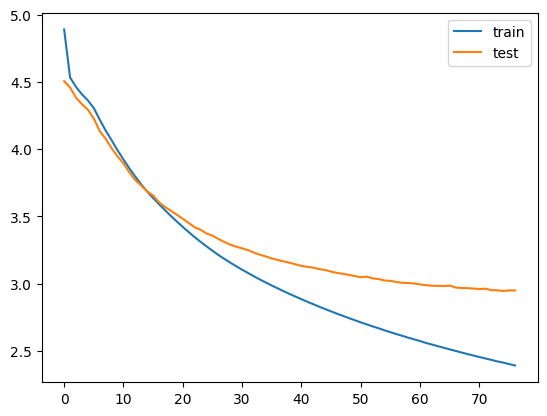

In [25]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [31]:
model.save('/content/drive/MyDrive/new_project/project2/model/model_english100.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어

# 인코더
encoder_model = Model(inputs = encoder_inputs, outputs = [encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size, ))
decoder_state_input_c = Input(shape=(hidden_size, ))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태를 이전 시점의 상태로 사용
# 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은틱 상태와 셀 상태인 state_h와 state_c를 버리지 않음
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# 어텐션 함수
decoder_hidden_state_input = Input(shape=(max_text_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat)

# 최종 디코더 모델
decoder_model = Model(
     [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
     [decoder_outputs2] + [state_h2, state_c2])
def decode_sequence(input_seq):
  # 입력으로부터 인코더의 상태를 얻음
  e_out, e_h, e_c = encoder_model.predict(input_seq)

  # <SOS>에 해당하는 토큰 생성
  target_seq = np.zeros((1,1))
  target_seq[0,0] = tar_word_to_index['starttoken']

  stop_condition = False
  decoded_sentence = ''
  while not stop_condition:

    output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
    sampled_token_index = np.argmax(output_tokens[0, -1, :])
    sampled_token = tar_index_to_word[sampled_token_index]

    if (sampled_token != 'endtoken'):
      decoded_sentence += ' '+sampled_token

    # <EOS>에 도달하거나 최대 길이를 넘으면 중단.
    if (sampled_token == 'endtoken' or len(decoded_sentence.split()) >= (max_headline_len - 1)):
      stop_condition = True

    # 길이가 1인 타겟 시퀀스를 업데이트
    target_seq = np.zeros((1,1))
    target_seq[0,0] = sampled_token_index

    # 상태를 업데이트 합니다.
    e_h, e_c = h, c

  return decoded_sentence

In [27]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['starttoken']) and i!=tar_word_to_index['endtoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [33]:
for i in range(250, 260):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, max_text_len)))
    print("\n")

원문 : last spring women day levi clebrated stories unstoppable women shaped world uccessful first season levi launches another season actor ileana cruz dancer shakti mohan model bani seeks empower nation powerful women telling stories fearless women struggles victories 
실제 요약 : levi clebrates women in the campaign 
1/1 [==============================] - 0s 21ms/step
예측 요약 :  why is the features of the world first female festival


원문 : police officers us state georgia discovered grow house crore worth mrijuana seeking arrest man unrelated charge officers found 287 plants 100 pounds weed ntered basement man house charged trafficking poessing manufacturing mrijuana 
실제 요약 : us cops accidentally find grow house with weed worth 8cr 
1/1 [==============================] - 0s 20ms/step
예측 요약 :  police seize drugs worth drugs worth drugs in bitcoin


원문 : supreme court wednesday xtended house arrest activists held conection bhima koregaon violence alleged maoist links till sptember 17 hearing 

In [36]:
result = []

for i in range(200, 300):
    text =  seq2text(encoder_input_test[i])
    origin_sum = seq2summary(decoder_input_test[i])
    new_sum = decode_sequence(encoder_input_test[i].reshape(1, max_text_len))

    result.append([text, origin_sum, new_sum])


result = pd.DataFrame(result, columns=['text', 'origin_sum', 'new_sum'])


1/1 [==============================] - 0s 20ms/step


In [38]:
result.to_excel('/content/drive/MyDrive/new_project/project2/result_100.xlsx')